<a href="https://colab.research.google.com/github/Vishnu-cpu516/portfolio/blob/main/spam_sms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Definition: This line imports the Pandas library and assigns it the alias pd. Purpose: The pd alias allows you to use Pandas functionality with a shorter reference. Pandas is typically used to handle and analyze data in tabular form (like spreadsheets or SQL tables) using its main data structures: Series (1D) and DataFrame (2D).

Definition: This line imports the NumPy library and assigns it the alias np. Purpose: NumPy is a library for numerical computations in Python. It provides support for large, multi-dimensional arrays and matrices, along with a wide variety of mathematical functions to operate on these arrays. The alias np is used for convenience.

Definition: This line imports the Natural Language Toolkit (nltk) library. Purpose: nltk is a library that helps with processing and analyzing human language (text). It contains tools for tasks like tokenization, part-of-speech tagging, stemming, and lemmatization. It is mainly used for natural language processing (NLP).

In [1]:
import pandas as pd
import numpy as np
import nltk

In [3]:
sms=pd.read_csv("spam.csv",encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
print(sms.shape)

(5572, 5)


In [6]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
print(sms)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [8]:
print(sms.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [9]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms = sms.rename(columns={"v1": "label", "v2": "text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
print(sms.columns)

Index(['label', 'text'], dtype='object')


In [12]:
for col in sms.columns:
  print(col,":",sms[col].unique)

label : <bound method Series.unique of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object>
text : <bound method Series.unique of 0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object>


In [13]:
sms.label.value_counts()

,count
label,
ham,4825
spam,747


In [14]:
sms.isnull().values.any()

np.False_

In [15]:
sms.isna().sum()

,0
label,0
text,0


In [16]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
sms_dup=sms.duplicated()
print(sms_dup.sum())

403


In [24]:
sms_cleaned=sms.drop_duplicates()
print(sms_cleaned.shape)

(5169, 3)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

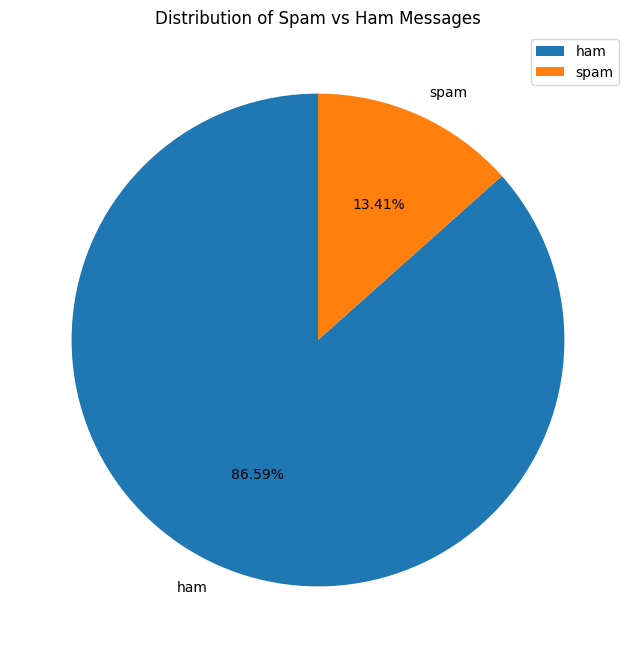

In [31]:
# Create the pie chart
plt.figure(figsize=(8, 8))

# Define sms_labels and sms_values *before* using them
sms_labels = sms['label'].unique()
sms_values = sms['label'].value_counts()

plt.pie(sms_values, labels=sms_labels, autopct='%1.2f%%', startangle=90)
plt.legend(loc='upper right')
plt.title('Distribution of Spam vs Ham Messages')
plt.show()

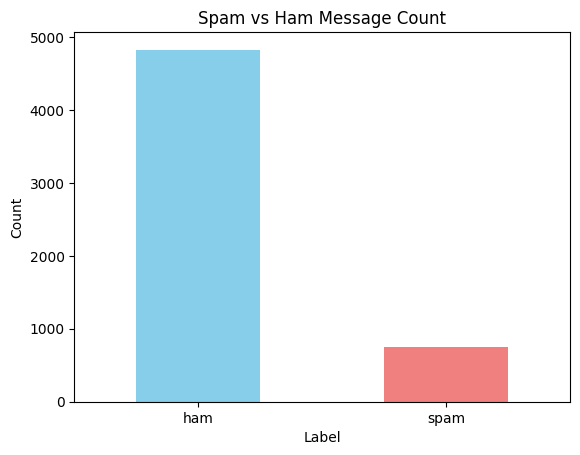

In [32]:
sms['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Spam vs Ham Message Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

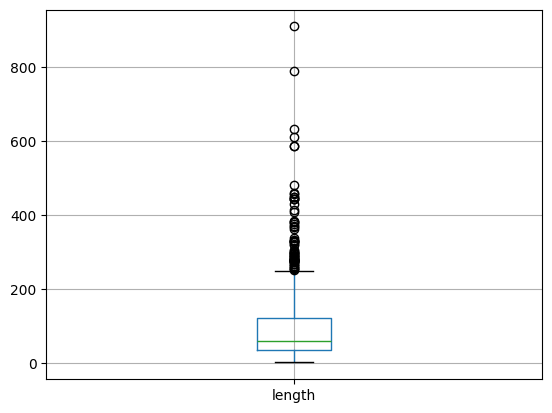

In [33]:
#create a boxplot for every column in df
boxplot = sms.boxplot(grid=True, vert=True,fontsize=10)

<Axes: ylabel='Frequency'>

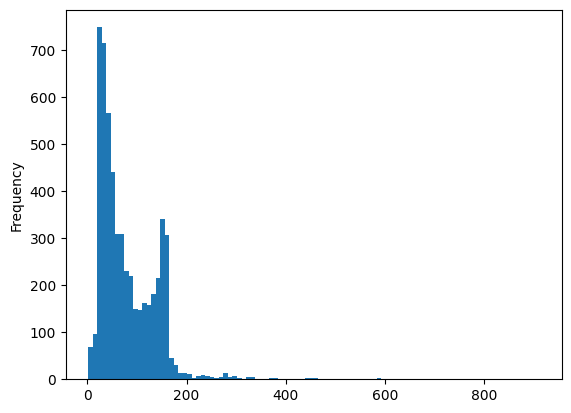

In [34]:
sms['length'].plot(bins=100, kind='hist')

sms.hist(column='length', by='label', bins=50, figsize=(10,4))

In [36]:
sms.loc[:, 'label'] = sms.label.map({'ham': 0, 'spam': 1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


step 3


In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and labels
X = sms['text']
y = sms['label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 96.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



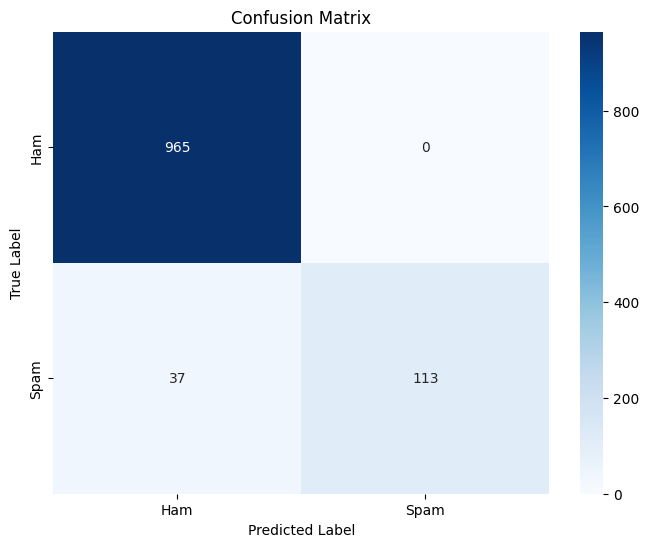

In [38]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to train and evaluate the model
def train_and_evaluate_model(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the TF-IDF Vectorizer and transform the text data
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Convert labels to integers if needed
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # Initialize and train the Naive Bayes model
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print the classification report for additional metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))  # Size of the plot
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Example usage:
# Assuming sms['text'] contains the text data and sms['label'] contains the labels
X = sms['text']
y = sms['label']

# Call the function to train and evaluate the model
train_and_evaluate_model(X, y)

In [39]:
pip install tensorflow

In [40]:
pip install scikit.learn

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8288 - loss: 0.4896 - val_accuracy: 0.9157 - val_loss: 0.1683
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9606 - loss: 0.1090 - val_accuracy: 0.9821 - val_loss: 0.0723
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9932 - loss: 0.0292 - val_accuracy: 0.9812 - val_loss: 0.0734
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9963 - loss: 0.0145 - val_accuracy: 0.9821 - val_loss: 0.0803
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9997 - loss: 0.0056 - val_accuracy: 0.9794 - val_loss: 0.0904
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 97.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.88      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted 

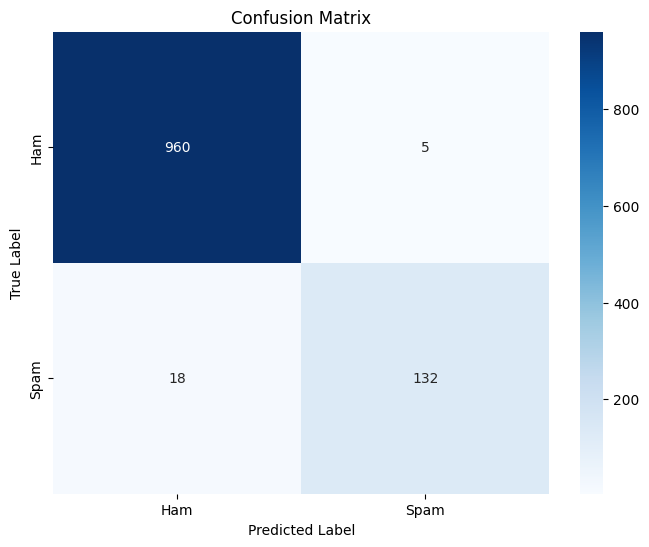

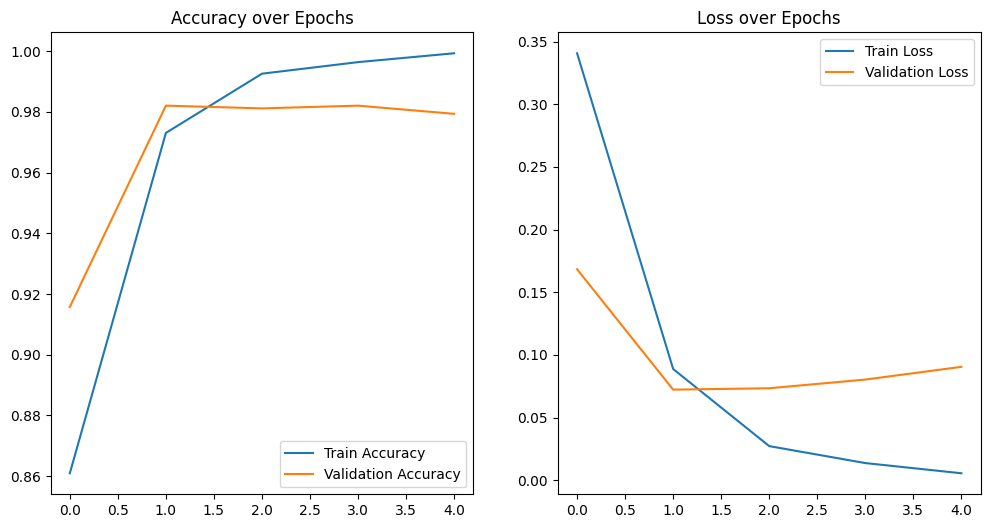

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to train and evaluate the Neural Network (DNN) Deep Neural Network
def train_and_evaluate_nn(X, y, test_size=0.2, random_state=42, epochs=5, batch_size=32):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the TF-IDF Vectorizer and transform the text data
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit number of features for efficiency
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Convert the labels into integers if needed
    y_train = np.array(y_train).astype(int)
    y_test = np.array(y_test).astype(int)

    # Build the Neural Network model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))  # First hidden layer
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_tfidf, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_tfidf, y_test))

    # Evaluate the model on the test set
    y_pred = (model.predict(X_test_tfidf) > 0.5).astype(int)  # Predict probabilities and convert to binary labels

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print the classification report for additional metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))  # Size of the plot
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot training history (accuracy and loss)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

# Example usage:
# Assuming sms['text'] contains the text data and sms['label'] contains the labels
X = sms['text']  # Text data
y = sms['label']  # Labels (e.g., 0 = Ham, 1 = Spam)

# Call the function to train and evaluate the model using Neural Network
train_and_evaluate_nn(X, y, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 130s 909ms/step - accuracy: 0.8836 - loss: 0.3016 - val_accuracy: 0.9803 - val_loss: 0.0763
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 117s 832ms/step - accuracy: 0.9837 - loss: 0.0555 - val_accuracy: 0.9812 - val_loss: 0.0705
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 143s 839ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9812 - val_loss: 0.0773
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 137s 803ms/step - accuracy: 0.9964 - loss: 0.0149 - val_accuracy: 0.9830 - val_loss: 0.0774
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 154s 889ms/step - accuracy: 0.9983 - loss: 0.0075 - val_accuracy: 0.9830 - val_loss: 0.0808
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step
Accuracy: 98.30%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.93      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96   

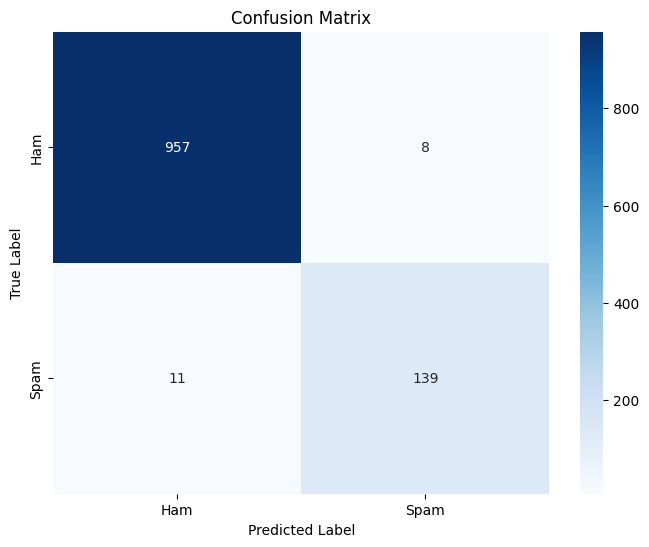

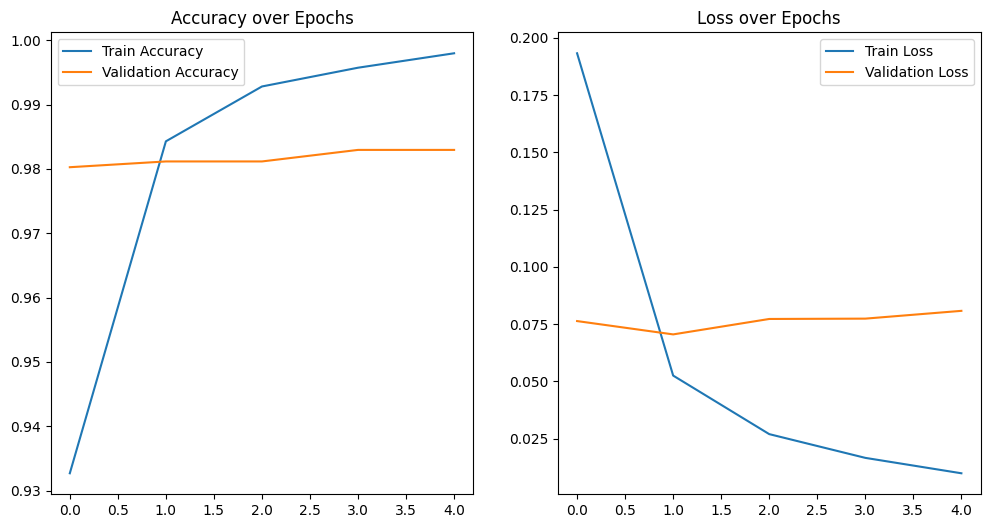

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to train and evaluate the CNN model
def train_and_evaluate_cnn(X, y, test_size=0.2, random_state=42, epochs=5, batch_size=32):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the TF-IDF Vectorizer and transform the text data
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit number of features for efficiency
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Convert the labels into integers if needed
    y_train = np.array(y_train).astype(int)
    y_test = np.array(y_test).astype(int)

    # Reshape the input data to fit CNN: (samples, timesteps, features)
    X_train_cnn = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
    X_test_cnn = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

    # Build the CNN model
    model = Sequential()
    model.add(Conv1D(128, 5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))  # Conv layer
    model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
    model.add(Flatten())  # Flatten the output for fully connected layer
    model.add(Dense(64, activation='relu'))  # Fully connected layer
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_cnn, y_test))

    # Evaluate the model on the test set
    y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)  # Predict probabilities and convert to binary labels

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print the classification report for additional metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))  # Size of the plot
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot training history (accuracy and loss)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

# Example usage:
# Assuming sms['text'] contains the text data and sms['label'] contains the labels
X = sms['text']  # Text data
y = sms['label']  # Labels (e.g., 0 = Ham, 1 = Spam)

# Call the function to train and evaluate the model using CNN
train_and_evaluate_cnn(X, y, epochs=5, batch_size=32)

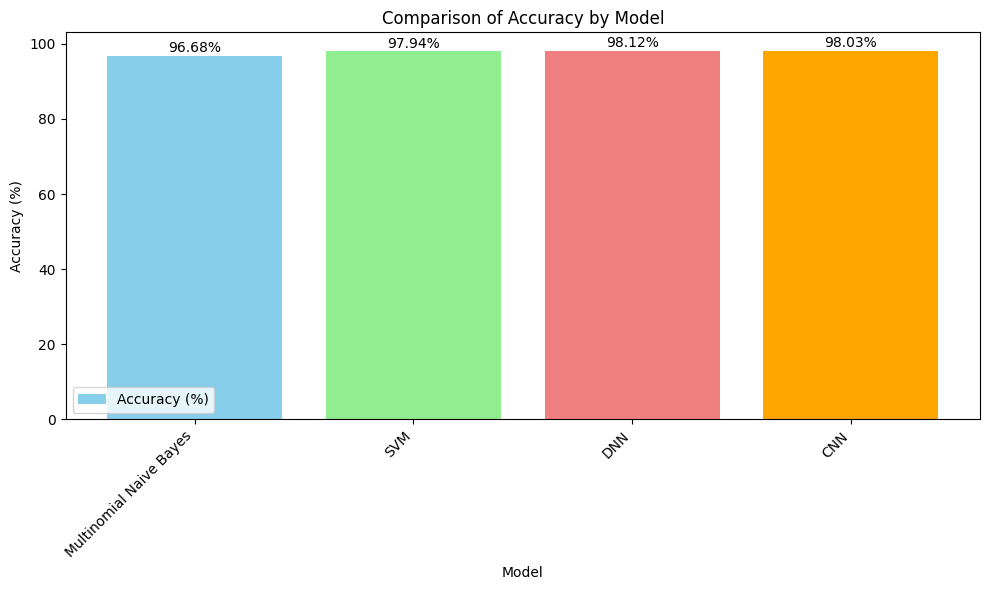

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Multinomial Naive Bayes', 'SVM', 'DNN', 'CNN']

# Updated Accuracy values
accuracy = [96.68, 97.94, 98.12, 98.03]

# Define a unique color for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']

# Position of bars on X-axis
x = np.arange(len(models))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting accuracy bars with unique colors
ax.bar(x, accuracy, color=colors, label='Accuracy (%)')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Adding text annotations on the bars
for i, v in enumerate(accuracy):
    ax.text(i, v + 0.2, f'{v:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()